In [1]:
import numpy as np

In [2]:
import pandas as pd

## 피봇테이블

In [4]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                       'B': ['A', 'B', 'C'] * 4,
                       'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D': np.random.randn(12),
                       'E': np.random.randn(12)})

In [5]:
df

,A,B,C,D,E
0,one,A,foo,-0.068815,-0.749692
1,one,B,foo,-0.563131,0.043467
2,two,C,foo,0.767469,-1.612656
3,three,A,bar,0.182910,0.048169
4,one,B,bar,0.588202,1.094826
5,one,C,bar,0.438945,-0.369783
6,two,A,foo,-1.536033,-0.895897
7,three,B,foo,-1.048891,0.874627
8,one,C,foo,0.487939,-0.701836
9,one,A,bar,1.599528,-0.327634


In [6]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.599528 -0.068815
      B  0.588202 -0.563131
      C  0.438945  0.487939
three A  0.182910       NaN
      B       NaN -1.048891
      C  0.491083       NaN
two   A       NaN -1.536033
      B -0.272281       NaN
      C       NaN  0.767469

## Time series

In [11]:
rng = pd.date_range('3/29/2020', periods=100, freq='S')

In [12]:
rng

DatetimeIndex(['2020-03-29 00:00:00', '2020-03-29 00:00:01',
               '2020-03-29 00:00:02', '2020-03-29 00:00:03',
               '2020-03-29 00:00:04', '2020-03-29 00:00:05',
               '2020-03-29 00:00:06', '2020-03-29 00:00:07',
               '2020-03-29 00:00:08', '2020-03-29 00:00:09',
               '2020-03-29 00:00:10', '2020-03-29 00:00:11',
               '2020-03-29 00:00:12', '2020-03-29 00:00:13',
               '2020-03-29 00:00:14', '2020-03-29 00:00:15',
               '2020-03-29 00:00:16', '2020-03-29 00:00:17',
               '2020-03-29 00:00:18', '2020-03-29 00:00:19',
               '2020-03-29 00:00:20', '2020-03-29 00:00:21',
               '2020-03-29 00:00:22', '2020-03-29 00:00:23',
               '2020-03-29 00:00:24', '2020-03-29 00:00:25',
               '2020-03-29 00:00:26', '2020-03-29 00:00:27',
               '2020-03-29 00:00:28', '2020-03-29 00:00:29',
               '2020-03-29 00:00:30', '2020-03-29 00:00:31',
               '2020-03-

In [13]:
ts = pd.Series(np.random.randint(0,500, len(rng)), index=rng)

In [14]:
ts

2020-03-29 00:00:00    136
2020-03-29 00:00:01    116
2020-03-29 00:00:02    317
2020-03-29 00:00:03    351
2020-03-29 00:00:04     75
                      ... 
2020-03-29 00:01:35    414
2020-03-29 00:01:36    160
2020-03-29 00:01:37     34
2020-03-29 00:01:38    261
2020-03-29 00:01:39    167
Freq: S, Length: 100, dtype: int32

In [15]:
ts.resample('5Min').sum()

2020-03-29    25588
Freq: 5T, dtype: int32

### 시간대 표현

In [16]:
rng = pd.date_range('3/29/2020 00:00', periods=5, freq='D')

In [17]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [18]:
ts

2020-03-29    0.328721
2020-03-30    1.056957
2020-03-31    0.272558
2020-04-01   -0.166717
2020-04-02    0.753099
Freq: D, dtype: float64

In [19]:
ts_utc = ts.tz_localize('UTC')

In [20]:
ts_utc

2020-03-29 00:00:00+00:00    0.328721
2020-03-30 00:00:00+00:00    1.056957
2020-03-31 00:00:00+00:00    0.272558
2020-04-01 00:00:00+00:00   -0.166717
2020-04-02 00:00:00+00:00    0.753099
Freq: D, dtype: float64

### 다른 시간대로 변환

In [21]:
ts_utc.tz_convert('US/Eastern')

2020-03-28 20:00:00-04:00    0.328721
2020-03-29 20:00:00-04:00    1.056957
2020-03-30 20:00:00-04:00    0.272558
2020-03-31 20:00:00-04:00   -0.166717
2020-04-01 20:00:00-04:00    0.753099
Freq: D, dtype: float64

### 시간 범위 표현 간 변환

In [22]:
rng = pd.date_range('3/29/2020', periods=5, freq='M')

In [23]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [24]:
ts

2020-03-31    1.397476
2020-04-30   -1.591410
2020-05-31   -0.945345
2020-06-30    0.975600
2020-07-31   -0.318230
Freq: M, dtype: float64

In [25]:
ps = ts.to_period()

In [26]:
ps

2020-03    1.397476
2020-04   -1.591410
2020-05   -0.945345
2020-06    0.975600
2020-07   -0.318230
Freq: M, dtype: float64

In [27]:
ps.to_timestamp()

2020-03-01    1.397476
2020-04-01   -1.591410
2020-05-01   -0.945345
2020-06-01    0.975600
2020-07-01   -0.318230
Freq: MS, dtype: float64

In [28]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [29]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [30]:
ts.index = (prng.asfreq('M','e') + 1 ).asfreq('H','s') + 9

In [31]:
ts.head()

1990-03-01 09:00    0.950893
1990-06-01 09:00    0.194935
1990-09-01 09:00   -0.769776
1990-12-01 09:00   -0.254603
1991-03-01 09:00    1.931283
Freq: H, dtype: float64

## 범주

In [32]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                       "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [33]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [34]:
df["grade"] = df["raw_grade"].astype("category")

In [35]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [36]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [37]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [38]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [39]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [40]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [42]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Floating

In [43]:
import matplotlib.pyplot as plt

In [44]:
plt.close('all')

In [45]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('3/29/2020', periods=1000))

In [46]:
ts = ts.cumsum()

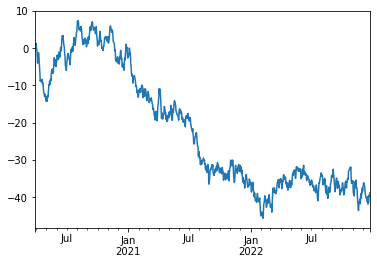

In [47]:
ts.plot()

In [48]:
ts

2020-03-29     1.223668
2020-03-30     1.102714
2020-03-31     1.026835
2020-04-01     1.251995
2020-04-02    -0.084818
                ...    
2022-12-19   -41.386529
2022-12-20   -39.486500
2022-12-21   -39.775490
2022-12-22   -38.915158
2022-12-23   -38.740397
Freq: D, Length: 1000, dtype: float64

In [51]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [52]:
df = df.cumsum()

In [53]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

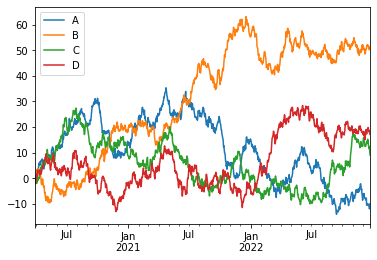

In [54]:
df.plot()

## 데이터 입/출력

### CSV

In [56]:
df.to_csv('foo.csv')

In [57]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2020-03-29,-0.409858,0.551401,-0.259044,-1.820072
1,2020-03-30,-0.525144,0.134316,-0.265434,-2.192025
2,2020-03-31,0.394510,0.471337,-1.052483,-1.440757
3,2020-04-01,1.163414,0.810495,-0.926317,0.370737
4,2020-04-02,1.230526,3.347613,-2.033116,1.229180
...,...,...,...,...,...
995,2022-12-19,-10.138209,50.940764,12.380075,18.210035
996,2022-12-20,-10.414592,50.484238,11.536030,18.696597
997,2022-12-21,-11.930721,50.187448,12.229197,18.470099
998,2022-12-22,-11.586462,50.870352,11.210033,17.877495


## HDF5

In [59]:
df.to_hdf('foo.h5', 'df')

In [60]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2020-03-29,-0.409858,0.551401,-0.259044,-1.820072
2020-03-30,-0.525144,0.134316,-0.265434,-2.192025
2020-03-31,0.394510,0.471337,-1.052483,-1.440757
2020-04-01,1.163414,0.810495,-0.926317,0.370737
2020-04-02,1.230526,3.347613,-2.033116,1.229180
...,...,...,...,...
2022-12-19,-10.138209,50.940764,12.380075,18.210035
2022-12-20,-10.414592,50.484238,11.536030,18.696597
2022-12-21,-11.930721,50.187448,12.229197,18.470099
2022-12-22,-11.586462,50.870352,11.210033,17.877495


## Excel

In [61]:
df.to_excel('foo.xlsx', sheet_name="Sheet1")

In [63]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2020-03-29,-0.409858,0.551401,-0.259044,-1.820072
1,2020-03-30,-0.525144,0.134316,-0.265434,-2.192025
2,2020-03-31,0.394510,0.471337,-1.052483,-1.440757
3,2020-04-01,1.163414,0.810495,-0.926317,0.370737
4,2020-04-02,1.230526,3.347613,-2.033116,1.229180
...,...,...,...,...,...
995,2022-12-19,-10.138209,50.940764,12.380075,18.210035
996,2022-12-20,-10.414592,50.484238,11.536030,18.696597
997,2022-12-21,-11.930721,50.187448,12.229197,18.470099
998,2022-12-22,-11.586462,50.870352,11.210033,17.877495
